# The battle of Neghborhoods
## TThe best location to open a seafood restaurant in Paris

*Author: Toni Asenov*

**Index**
1. Business Problem
2. Download Data
3. Location Placement on the map of Paris
    * Explore the city
4. Rating og Venue
5. Category of Venue
    * Count
6. Histo
    * Let's create the Histo
7. Analyze for each Categories
    * The top 10 most common venue
8. Search by Interest's Venue with Clisters Method
    * Visualization 
    * Cluster 0 Musée du louvre
    * Cluster 1 Arc de Triomphe
    * Cluster 2 Tour Eiffel
    * Cluster 3 Notre Dame de Paris
9. View on particular venue- Tour Eiffel
    * Count number of Rating, Tips and Likes - Tour Eiffel
    * Look at Tips and Text
10. Research of Sports- Notre Dame
    * Visualization with World Cloud
    * Map Visualization 
11. Tendance of this Venue
12. Results Summary

### 1. Business Problem

One of our Italian clients wants to expand their business throughout Europe. The client has experience with restaurants in maritime cities and because of that his restaurant offer Seafood. He wants to open his first restaurant in the capital of France, Paris.

The client has obtained very good results in big cities locates the restaurant close to the tourists part. Now he wants to know how saturated is the Italian restaurant market in Paris, especially for Seafood. 

Paris is one of the most popular tourist destinations in the world, with over 30 million foreign visitors per year. As the paragon of style, Paris is one of the most glamorous cities in the world. 

The "City of Light", is the apex of architectural beauty, artistic expression, and culinary delight.

**Problem:
Where is the best location to expand his chain in Paris with the possibility of doing good business?**

In [1]:

# Libraries
!pip install geopy
!conda install -c conda-forge folium=0.5.0 --yes 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

## Step 1 - Download data

In [2]:
# download data
paris_data = pd.read_csv("https://lvdesign.com.fr/coursera_data/paris.csv")
paris_data

,Lieux,Latitude,Longitude
0,Musée du Louvre,48.860611,2.335450
1,Notre Dame de Paris,48.852968,2.347708
2,Arc de Triomphe,48.873792,2.295028
3,Tour Eiffel,48.858370,2.294481


## Step 2 - Location Placement on the map of Paris


In [3]:
# Localise Lieux on the map Paris
address = 'Paris, FR'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566101, 2.3514992.


## Create Map of Paris

In [4]:
# create map of Paris using lat/lng values
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Lieux']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

In [5]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'Hidden' # your Foursquare ID
CLIENT_SECRET = 'Hidden' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


## Explore the city of Paris

In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Lieux', 
                  'Lieux Latitude', 
                  'Lieux Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'
                             
                   ]
    
    return(nearby_venues)

## Step 3 Rating of Venue

In [7]:
# test rating
# Musée du Louvre 4adcda10f964a520af3521e3
# Cathédrale Notre-Dame de Paris 4adcda09f964a520e83321e3
# Tour Eiffel 51a2445e5019c80b56934c75
# Arc de Triomphe 4adcda09f964a520de3321e3

venue_id ={
    'Musée du Louvre': '4adcda10f964a520af3521e3',
    'Cathédrale Notre-Dame de Paris': '4adcda09f964a520e83321e3',
    'Tour Eiffel': '51a2445e5019c80b56934c75',
    'Arc de Triomphe': '4adcda09f964a520de3321e3'
}

for key,value in venue_id.items():
    
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(value, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        print('Venue :', key)
        print('Rating : ', result['response']['venue']['rating'])
        print('Total Tips : ', result['response']['venue']['tips']['count'])
        print('Nb Likes : ', result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])
        print('Nb Likes / Total Tips', (result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])/ (result['response']['venue']['tips']['count']) *100 )
        
        print()

    except:
        print('This venue has not been rated yet.')

Venue : Musée du Louvre
Rating :  9.4
Total Tips :  2242
Nb Likes :  167
Nb Likes / Total Tips 7.448706512042818

Venue : Cathédrale Notre-Dame de Paris
Rating :  9.4
Total Tips :  967
Nb Likes :  57
Nb Likes / Total Tips 5.894519131334023

Venue : Tour Eiffel
Rating :  9.4
Total Tips :  2605
Nb Likes :  934
Nb Likes / Total Tips 35.854126679462574

Venue : Arc de Triomphe
Rating :  9.5
Total Tips :  757
Nb Likes :  102
Nb Likes / Total Tips 13.474240422721268



## Step 4 Category of Venue

In [8]:
paris_data_venues = getNearbyVenues(names=paris_data['Lieux'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )
#print(paris_data_venues.shape)
paris_data_venues

Musée du Louvre
Notre Dame de Paris
Arc de Triomphe
Tour Eiffel


,Lieux,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Musée du Louvre,48.860611,2.335450,Musée du Louvre,4adcda10f964a520af3521e3,48.860847,2.336440,Art Museum
1,Musée du Louvre,48.860611,2.335450,La Vénus de Milo (Vénus de Milo),5864efb745c3ed1e7d88e96d,48.859943,2.337234,Exhibit
2,Musée du Louvre,48.860611,2.335450,Vestige de la Forteresse du Louvre,4f6dabf5003944083fe0002e,48.861577,2.333508,Historic Site
3,Musée du Louvre,48.860611,2.335450,Cour Napoléon,5072efe7e4b0c34b5146e7fd,48.861172,2.335088,Plaza
4,Musée du Louvre,48.860611,2.335450,Cour Carrée du Louvre,4c079d740ed3c928b6be797d,48.860360,2.338543,Pedestrian Plaza
5,Musée du Louvre,48.860611,2.335450,Mona Lisa | La Joconde,56f279c4cd10850a585f5e31,48.860139,2.335337,Exhibit
6,Musée du Louvre,48.860611,2.335450,Place du Palais Royal,4b071505f964a520dcf622e3,48.862523,2.336688,Plaza
7,Musée du Louvre,48.860611,2.335450,"Pavillon des Sessions – Arts d'Afrique, d'Asie...",588ba9a9fc5a5f18a36a2a05,48.860724,2.332121,Art Museum
8,Musée du Louvre,48.860611,2.335450,Carrousel du Louvre,4adcda1df964a5202e3921e3,48.861642,2.334217,Shopping Mall
9,Musée du Louvre,48.860611,2.335450,La Victoire de Samothrace,5864f22d4bc2f1753ba5b072,48.860016,2.336782,Exhibit


## Step 5 Histo

In [9]:
df_view_new = paris_data_venues.groupby('Lieux').count()
df_paris_histo = df_view_new['Venue Category']
df_paris_histo

Lieux
Arc de Triomphe        100
Musée du Louvre        100
Notre Dame de Paris    100
Tour Eiffel             50
Name: Venue Category, dtype: int64

## Let's create the Histo

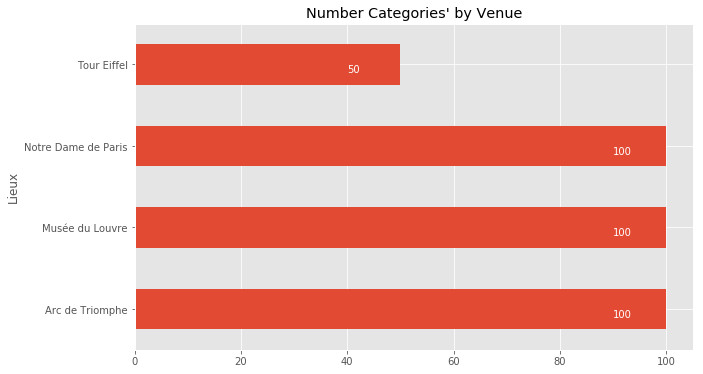

In [10]:
df_paris_histo.plot(kind='barh', figsize=(10,6))

#plt.xlabel('name') # add to x-label to the plot
#plt.ylabel('Number de categories') # add y-label to the plot
plt.title('Number Categories\' by Venue') # add title to the plot

for index, value in enumerate(df_paris_histo): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 10, index - 0.10), color='white')
    
plt.show()

## Step 6 Analyze for each Categories

In [11]:
#Analyze Each Lieux
# one hot encoding
paris_onehot = pd.get_dummies(paris_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add Lieux column back to dataframe
paris_onehot['Lieux'] = paris_data_venues['Lieux'] 

# move lieux column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Lieux,Antique Shop,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Auvergne Restaurant,Bagel Shop,Bakery,Bar,Beach Bar,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Breton Restaurant,Bridge,Burger Joint,Bus Stop,Café,Candy Store,Cantonese Restaurant,Caucasian Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Exhibit,Fast Food Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Government Building,Gym,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lebanese Restaurant,Library,Market,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Optical Shop,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sports Bar,Steakhouse,Tea Room,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Yoga Studio
0,Musée du Louvre,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Musée du Louvre,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Next, 
# let's group rows by Lieux
# and by taking the mean of the frequency of occurrence of each category
paris_grouped = paris_onehot.groupby('Lieux').mean().reset_index()
paris_grouped

,Lieux,Antique Shop,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Auvergne Restaurant,Bagel Shop,Bakery,Bar,Beach Bar,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Breton Restaurant,Bridge,Burger Joint,Bus Stop,Café,Candy Store,Cantonese Restaurant,Caucasian Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Exhibit,Fast Food Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Government Building,Gym,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lebanese Restaurant,Library,Market,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Optical Shop,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sports Bar,Steakhouse,Tea Room,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Yoga Studio
0,Arc de Triomphe,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.03,0.01,0.00,0.02,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.01,0.00,0.01,0.06,0.02,0.00,0.03,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.01,0.01,0.02,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.03,0.01,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00
1,Musée du Louvre,0.01,0.03,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.00,0.02,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.07,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.01,0.04,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.02,0.00,0.00,0.03,0.00,0.00,0.00,0.15,0.01,0.01,0.01,0.01,0.00,0.05,0.00,0.00,0.08,0.00,0.01,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.06,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.02,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
2,Notre Dame de Paris,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.04,0.04,0.00,0.01,0.05,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.04,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.02,0.00,0.02,0.00,0.00,0.03,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.15,0.00,0.02,0.00,0.00,0.01,0.01,0.01,0.01,0.03,0.00,0.03,0.00,0.00,0.03,0.02,0.00,0.01,0.00,0.00,0.02,0.00,0.01,0.00,0.03,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01
3,Tour Eiffel,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.02,0.04,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.06,0.00,0.00,0.00,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.02,0.02,0.00,0.00,0.02,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00


In [13]:
#
#Let's print each Lieux along with the top 10 most common venues¶
num_top_venues = 10

for hood in paris_grouped['Lieux']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Lieux'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arc de Triomphe----
                venue  freq
0               Hotel  0.23
1   French Restaurant  0.15
2  Italian Restaurant  0.06
3      Sandwich Place  0.03
4    Asian Restaurant  0.03
5       Jewelry Store  0.03
6              Bakery  0.03
7       Movie Theater  0.02
8                 Spa  0.02
9           Nightclub  0.02


----Musée du Louvre----
               venue  freq
0  French Restaurant  0.15
1              Hotel  0.08
2               Café  0.07
3              Plaza  0.06
4      Historic Site  0.05
5        Coffee Shop  0.04
6     Cosmetics Shop  0.03
7            Exhibit  0.03
8             Museum  0.03
9         Art Museum  0.03


----Notre Dame de Paris----
                 venue  freq
0    French Restaurant  0.15
1            Bookstore  0.05
2                 Café  0.04
3               Bakery  0.04
4                  Bar  0.04
5                Plaza  0.04
6             Creperie  0.03
7                Hotel  0.03
8  Japanese Restaurant  0.03
9   Mexican Restaurant  0

In [14]:
#Let's put that into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [15]:
#Now let's create the new dataframe 
#and display the top 10 venues for each Lieux.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Lieux']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lieux_venues_sorted = pd.DataFrame(columns=columns)
lieux_venues_sorted['Lieux'] = paris_grouped['Lieux']

for ind in np.arange(paris_grouped.shape[0]):
    lieux_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

lieux_venues_sorted

,Lieux,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arc de Triomphe,Hotel,French Restaurant,Italian Restaurant,Jewelry Store,Sandwich Place,Asian Restaurant,Bakery,Spa,Nightclub,Movie Theater
1,Musée du Louvre,French Restaurant,Hotel,Café,Plaza,Historic Site,Coffee Shop,Cosmetics Shop,Museum,Exhibit,Art Museum
2,Notre Dame de Paris,French Restaurant,Bookstore,Bar,Bakery,Café,Plaza,Japanese Restaurant,Ice Cream Shop,Creperie,Mexican Restaurant
3,Tour Eiffel,French Restaurant,Italian Restaurant,Hotel,Café,Bakery,Garden,Bistro,Gift Shop,Bus Stop,Plaza


## Step 7 Search by Interest's Venues with Clusters Method

In [16]:
# set number of clusters
kclusters = 4

paris_grouped_clustering = paris_grouped.drop('Lieux', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 1, 2], dtype=int32)

In [17]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each Lieux.

paris_merged = paris_data

# add clustering labels
paris_merged['Cluster Labels'] = kmeans.labels_

paris_merged = paris_merged.join(lieux_venues_sorted.set_index('Lieux'), on='Lieux')
paris_merged 
# check the last columns!

,Lieux,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Musée du Louvre,48.860611,2.335450,0,French Restaurant,Hotel,Café,Plaza,Historic Site,Coffee Shop,Cosmetics Shop,Museum,Exhibit,Art Museum
1,Notre Dame de Paris,48.852968,2.347708,3,French Restaurant,Bookstore,Bar,Bakery,Café,Plaza,Japanese Restaurant,Ice Cream Shop,Creperie,Mexican Restaurant
2,Arc de Triomphe,48.873792,2.295028,1,Hotel,French Restaurant,Italian Restaurant,Jewelry Store,Sandwich Place,Asian Restaurant,Bakery,Spa,Nightclub,Movie Theater
3,Tour Eiffel,48.858370,2.294481,2,French Restaurant,Italian Restaurant,Hotel,Café,Bakery,Garden,Bistro,Gift Shop,Bus Stop,Plaza


## Visualization

In [18]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**3 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Lieux'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster 0 Musée du louvre

In [19]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,48.860611,Hotel,Café,Plaza,Historic Site,Coffee Shop,Cosmetics Shop,Museum,Exhibit,Art Museum


## Cluster 1 Arc de Triomphe

In [20]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,48.873792,French Restaurant,Italian Restaurant,Jewelry Store,Sandwich Place,Asian Restaurant,Bakery,Spa,Nightclub,Movie Theater


## Cluster 2 Tour Eiffel

In [21]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]


,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,48.85837,Italian Restaurant,Hotel,Café,Bakery,Garden,Bistro,Gift Shop,Bus Stop,Plaza


## Cluster 3 Notre Dame de Paris

In [22]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,48.852968,Bookstore,Bar,Bakery,Café,Plaza,Japanese Restaurant,Ice Cream Shop,Creperie,Mexican Restaurant


## Step 8 View on particular Venue- Tour Eiffel

In [23]:
#Get the Lieux latitude and longitude values.
lieux_latitude = paris_data.loc[3, 'Latitude'] # lieux latitude value
lieux_longitude = paris_data.loc[3, 'Longitude'] # Lieux  longitude value

lieux_name = paris_data.loc[3, 'Lieux'] # Lieux name

print('Latitude and longitude values of {} are {}, {}.'.format(lieux_name, 
                                                               lieux_latitude, 
                                                               lieux_longitude))

Latitude and longitude values of Tour Eiffel are 48.8583701, 2.2944812999999997.


In [24]:
#First, let's create the GET request URL. Name your URL url.
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# type your answer here
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lieux_latitude,lieux_longitude,radius,LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=L1BUZR21FRAQ4JHVZACEPJ3HFOYIW5VRTNW10QJOM1NIXZR4&client_secret=AEKZNMTIF3YQQBLCHS0YGETIVUWKMUY1NWVUNH4T1Q0F4XA4&v=20180605&ll=48.8583701,2.2944812999999997&radius=500&limit=100'

In [25]:
#Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d51d73622be1200259bef24'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Tour Eiffel - Parc du Champ-de-Mars',
  'headerFullLocation': 'Tour Eiffel - Parc du Champ-de-Mars, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 50,
  'suggestedBounds': {'ne': {'lat': 48.862870104500004,
    'lng': 2.301308246677155},
   'sw': {'lat': 48.8538700955, 'lng': 2.2876543533228446}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51a2445e5019c80b56934c75',
       'name': 'Tour Eiffel',
       'location': {'address': '5 avenue Anatole France',
        'crossStreet': 'Parc du Champ-de-Mars',
        'lat': 48.858249354605626,
      

In [26]:
# def Categories with Foursquare Type
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
# determine Venues 
# Now we are ready to clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.id']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng,id
0,Tour Eiffel,Monument / Landmark,48.858249,2.294426,51a2445e5019c80b56934c75
1,Restaurant 58 Tour Eiffel,French Restaurant,48.858366,2.294249,4e078807e4cdefcff6dce4f6
2,Le Jules Verne,French Restaurant,48.858245,2.294530,4b5972b9f964a5208b8828e3
3,Bar à Champagne de la Tour Eiffel,Champagne Bar,48.858313,2.294411,4d55537db4deb1f71d41037a
4,Carrousel de la Tour Eiffel,Theme Park Ride / Attraction,48.858972,2.292631,4dab1ab0fa8cc76497446a89
5,Residence Charles Floquet,Hotel,48.856306,2.294318,54c57345498e47f3d60203c7
6,Musée du Quai Branly – Jacques Chirac,Art Museum,48.860849,2.297423,4adcda10f964a520ae3521e3
7,Hôtel Pullman Paris Tour Eiffel,Hotel,48.855791,2.292605,4c0f74e2d64c0f479fbc295d
8,Place Jacques Rueff,Plaza,48.856183,2.298007,5427e002498e8525dc98dd65
9,Capriccio Sorrentino,Italian Restaurant,48.859208,2.297896,50b60a4ee4b0c55f394cee7a


## Count number of Rating, Tips and Likes - Tour Eiffel

In [29]:
# Comptabiliser le nombre de rating selon le lieux

venue_id = '51a2445e5019c80b56934c75' # Tour Eiffel 51a2445e5019c80b56934c75
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('Rating : ', result['response']['venue']['rating'])
    print('Total Tips : ', result['response']['venue']['tips']['count'])
    print('Nb Likes : ', result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])
    print('Nb Likes / Total Tips', (result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])/ (result['response']['venue']['tips']['count']) *100 )
except:
    print('This venue has not been rated yet.')

Rating :  9.4
Total Tips :  2605
Nb Likes :  934
Nb Likes / Total Tips 35.854126679462574


## Look at Tips and Text

In [30]:
## Ecco Tips
venue_id = '51a2445e5019c80b56934c75'
limit = 200 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d51d7d666dc06002582f2a5'},
 'response': {'tips': {'count': 2607,
   'items': [{'id': '51dacd8c498e81059bd6817e',
     'createdAt': 1373293964,
     'text': 'Apparently the Eiffel Tower grows in summer! Made of iron, it expands with heat & can get more than 15 cm taller.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/51dacd8c498e81059bd6817e',
     'photo': {'id': '51dacd8e7dd24494a9f55740',
      'createdAt': 1373293966,
      'source': {'name': 'Foursquare Web', 'url': 'https://foursquare.com'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/2960181_QytskOzX9KNE4z9ifAJtXTjT6YE6Zqc_volw8k3mSzE.jpg',
      'width': 755,
      'height': 960,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/img/general/original/2960181_QytskOzX9KNE4z9ifAJtXTjT6YE6Zqc_volw8k3mSzE.jpg',
     'lang': 'en',
     'likes': {'count': 934,
      'groups': [{'type': 'others', 'count': 934, 'items': []

In [31]:
# test avis sur Lieux
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'lastVoteText', 'lastUpvoteTimestamp', 'todo', 'user'])

In [32]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Apparently the Eiffel Tower grows in summer! Made of iron, it expands with heat & can get more than 15 cm taller.",1111,0,51dacd8c498e81059bd6817e,Lufthansa,NaN,none,2960181


## Step 9 Research of Sports- Notre Dame

In [33]:
#First, let's create the GET request URL. Name your URL url.
LIMIT = 150 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=L1BUZR21FRAQ4JHVZACEPJ3HFOYIW5VRTNW10QJOM1NIXZR4&client_secret=AEKZNMTIF3YQQBLCHS0YGETIVUWKMUY1NWVUNH4T1Q0F4XA4&ll=48.8566101,2.3514992&v=20180605&radius=500&limit=150'

In [34]:
results = requests.get(url).json()
'There are {} popular spots around.'.format(len(results['response']['groups'][0]['items']))

'There are 100 popular spots around.'

In [35]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4bf41231e5eba59334341f90',
  'name': "Place de l'Hôtel de Ville – Esplanade de la Libération",
  'location': {'address': "Place de l'Hôtel de Ville",
   'lat': 48.85692475726913,
   'lng': 2.3514118156673676,
   'distance': 35,
   'postalCode': '75004',
   'cc': 'FR',
   'city': 'Paris',
   'state': 'Île-de-France',
   'country': 'France',
   'formattedAddress': ["Place de l'Hôtel de Ville", '75004 Paris', 'France']},
  'categories': [{'id': '4bf58dd8d48988d164941735',
    'name': 'Plaza',
    'pluralName': 'Plazas',
    'shortName': 'Plaza',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-4bf41231e5eba59334341f90-0'}

In [36]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [37]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Place de l'Hôtel de Ville – Esplanade de la Libération,Plaza,Place de l'Hôtel de Ville,FR,Paris,France,NaN,35,"[Place de l'Hôtel de Ville, 75004 Paris, France]",NaN,48.856925,2.351412,NaN,75004,Île-de-France,4bf41231e5eba59334341f90
1,Parc Rives de Seine,Park,Quais de Seine,FR,Paris,France,NaN,122,"[Quais de Seine, 75000 Paris, France]","[{'label': 'display', 'lat': 48.85551048052973, 'lng': 2.3514188826084137}]",48.855510,2.351419,NaN,75000,Île-de-France,58e0f18f561ded7abcbbbd01
2,Berges de Seine – Rive droite,Pedestrian Plaza,De la passerelle Léopold-Sédar-Senghor au port de l'Arsenal,FR,Paris,France,NaN,174,"[De la passerelle Léopold-Sédar-Senghor au port de l'Arsenal, Paris, France]","[{'label': 'display', 'lat': 48.855130568830376, 'lng': 2.352289446225441}]",48.855131,2.352289,NaN,NaN,Île-de-France,58d800df9435a979b8a645fa
3,L'Alsacien,Alsatian Restaurant,6 rue Saint-Bon,FR,Paris,France,NaN,202,"[6 rue Saint-Bon, 75004 Paris, France]","[{'label': 'display', 'lat': 48.85827502747949, 'lng': 2.3503806119494897}]",48.858275,2.350381,NaN,75004,Île-de-France,54351b59498e123ee4afc7ff
4,Häagen-Dazs,Ice Cream Shop,1 Rue d'Arcole,FR,Paris,France,NaN,213,"[1 Rue d'Arcole, 75004 Paris, France]","[{'label': 'display', 'lat': 48.854878832572616, 'lng': 2.3502331483471153}]",48.854879,2.350233,NaN,75004,Île-de-France,4cb2fc20db32f04d6da9d34d
5,LUSH,Cosmetics Shop,3 rue du Renard,FR,Paris,France,NaN,131,"[3 rue du Renard, 75004 Paris, France]","[{'label': 'display', 'lat': 48.85779127633849, 'lng': 2.3516219632738213}]",48.857791,2.351622,NaN,75004,Île-de-France,4d628e33e4fe548152b8979e
6,BHV Marais,Department Store,52 rue de Rivoli,FR,Paris,France,Rue de Rivoli,174,"[52 rue de Rivoli (Rue de Rivoli), 75004 Paris, France]","[{'label': 'display', 'lat': 48.8573123, 'lng': 2.3536331}]",48.857312,2.353633,NaN,75004,Île-de-France,4b4b6a3df964a520b89a26e3
7,Maison Aleph,Pastry Shop,20 rue de la Verrerie,FR,Paris,France,NaN,260,"[20 rue de la Verrerie, 75004 Paris, France]","[{'label': 'display', 'lat': 48.857348, 'lng': 2.354873}]",48.857348,2.354873,NaN,75004,Île-de-France,59247f4e0d2be70573edd834
8,Square de la Tour Saint-Jacques,Park,88 rue de Rivoli,FR,Paris,France,NaN,245,"[88 rue de Rivoli, 75001 Paris, France]","[{'label': 'display', 'lat': 48.857882297703746, 'lng': 2.348756790161133}]",48.857882,2.348757,NaN,75001,Île-de-France,4dbd336b6a23e294ba405cfa
9,Tour Saint-Jacques,Historic Site,88 rue de Rivoli,FR,Paris,France,NaN,248,"[88 rue de Rivoli, 75004 Paris, France]","[{'label': 'display', 'lat': 48.858030532545826, 'lng': 2.348874807357788}]",48.858031,2.348875,NaN,75004,Île-de-France,4b5c7d1ff964a5205f3229e3


In [38]:
newTest = dataframe_filtered[['name', 'categories']]
newTest

,name,categories
0,Place de l'Hôtel de Ville – Esplanade de la Libération,Plaza
1,Parc Rives de Seine,Park
2,Berges de Seine – Rive droite,Pedestrian Plaza
3,L'Alsacien,Alsatian Restaurant
4,Häagen-Dazs,Ice Cream Shop
5,LUSH,Cosmetics Shop
6,BHV Marais,Department Store
7,Maison Aleph,Pastry Shop
8,Square de la Tour Saint-Jacques,Park
9,Tour Saint-Jacques,Historic Site


In [39]:
# Some activities
print(dataframe_filtered.categories.unique())

['Plaza' 'Park' 'Pedestrian Plaza' 'Alsatian Restaurant' 'Ice Cream Shop'
 'Cosmetics Shop' 'Department Store' 'Pastry Shop' 'Historic Site'
 'Souvenir Shop' "Men's Store" 'Art Gallery' 'Furniture / Home Store'
 'Lyonese Bouchon' 'Gluten-free Restaurant' 'Hotel' 'Perfume Shop'
 'Theater' 'Bakery' 'Bagel Shop' 'French Restaurant' 'Auvergne Restaurant'
 'Frozen Yogurt Shop' 'Gay Bar' 'Cocktail Bar' 'Coffee Shop' 'Fountain'
 'Flower Shop' 'Dessert Shop' 'Clothing Store' 'Café' 'Seafood Restaurant'
 'Tea Room' "Women's Store" 'Church' 'Sushi Restaurant'
 'Portuguese Restaurant' 'Wine Bar' 'Jazz Club' 'Pet Store' 'Pub'
 'Lingerie Store' 'Chinese Restaurant' 'Restaurant' 'Bookstore'
 'Scenic Lookout' 'Memorial Site' 'Miscellaneous Shop'
 'Arts & Crafts Store' 'Deli / Bodega' 'Art Museum' 'Burger Joint'
 'Italian Restaurant' 'Gourmet Shop' 'Bistro' 'Indie Movie Theater'
 'Tapas Restaurant' 'Creperie' 'Bar']


## Visualization with Word Cloud

In [40]:
## word clouds sur les tendances de ce lieux
!conda install -c conda-forge wordcloud==1.4.1 --yes


# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Wordcloud is installed and imported!


In [41]:
newTest_words = dataframe_filtered[['categories']]
newTest_words.head()

,categories
0,Plaza
1,Park
2,Pedestrian Plaza
3,Alsatian Restaurant
4,Ice Cream Shop


In [42]:
newTest_words.to_csv('myTexteTourEiffel.txt', sep=',', index=False)


In [43]:
myTest = open('myTexteTourEiffel.txt', 'r').read()

In [44]:
stopwords = set(STOPWORDS)

In [45]:
tour_eiffel_wc = WordCloud(
background_color='white',
    max_words=2000,
    stopwords=stopwords
)

tour_eiffel_wc.generate(myTest)

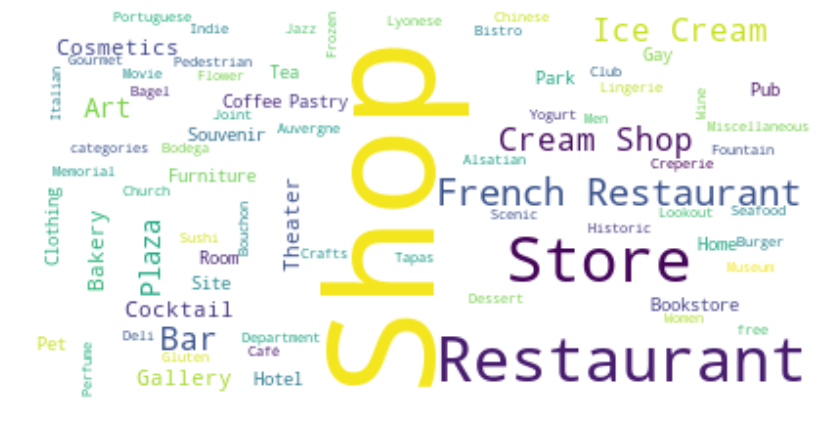

In [46]:
# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(tour_eiffel_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Map Visualization 

In [47]:
#Let's visualize these items on the map around our location¶
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco

#colors = [purple, orange, darkred,lightred,beige,darkblue, darkgreen, cadetblue, darkpurple, pink, lightblue, lightgreen,lightgray]
# categories
#

# folium.Marker([lat, lon], popup=str(name)+': '+color+'-'+str(clname), icon=folium.Icon(color=color)).add_to(feature_group)

# add Ecco as a red circle mark
label = folium.Popup('eiffel', parse_html=True)
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup=label,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, name, category in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name, dataframe_filtered.categories):
    label = '{}, {}'.format(name, category)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        fill=True,
        color= 'green',
        fill_color = 'black',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

## Step 10 Tendance of this Venue

In [48]:
# tendances du quartier
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
#results

In [49]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [50]:
# display trending venues
trending_venues_df

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,Paris,City,44,NaN,75000,Île-de-France,France,48.857006,2.35149


## Map visualization 

In [51]:
#Visualize trending venues

if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    label = folium.Popup('Arc de Triomphe', parse_html=True)
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=15,
        popup=label,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, name, category in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name'], trending_venues_df['categories']):
        label = '{}, {}'.format(name, category)
        label = folium.Popup(label, parse_html=True)
        folium.features.CircleMarker(
            [lat, lng],
            radius=10,
            poup=label,
            fill=True,
            color='blue',
            fill_color='black',
            fill_opacity=0.6
        ).add_to(venues_map)

In [52]:
venues_map

# The End of the data analysis.